In [76]:
import nltk
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from preprocess.normalize_sentences import SentenceNormalizer
%matplotlib inline

DATA_PATH = '../../data/'
OUTPUT_PATH = os.path.join(DATA_PATH, 'final')

if not os.path.exists(OUTPUT_PATH):
    os.mkdir(OUTPUT_PATH)

def word_count(sent):
    return len(sent.split(' '))


def save_dataset(df, file_name):
    final_path = os.path.join(OUTPUT_PATH, file_name)
    df.to_csv(final_path, index=False, encoding='utf-8', sep='\t',
              columns=['sentence_normalized', 'label'],
              header=['sentence', 'label'])


## Prepare MTusk data

In [77]:
mtusk_file = os.path.join(DATA_PATH, 'mtusk/results_11.13.17.csv')

# Load data
mtusk_df = pd.read_csv(mtusk_file, usecols=['Input.sentence', 'Answer.categories'])
mtusk_df.columns = ['sentence', 'label']
mtusk_df['label'] = mtusk_df['label'].map({'category 2': 'subjective', 'category 1': 'objective', 'category 3': 'other'})
mtusk_df.head(10)

,sentence,label
0,I have wrestled the bears of tax burdens and o...,subjective
1,"""We have not found anything at this point that...",objective
2,Cannabis awareness reaches a tipping point^ gr...,subjective
3,[See Photos of the Newly Uncovered Step Pyrami...,subjective
4,Tzekos was also banned for two years by the IAAF.,objective
5,"""For mothers with babies^ there is no research...",objective
6,In 1997^ he was shot dead on its front steps b...,objective
7,Right to bear arms.,other
8,State lawmakers are still holding hearings int...,objective
9,And if youre really looking to enhance the det...,subjective


## Prepare IMDB data

In [78]:
imdb_file = os.path.join(DATA_PATH, 'imdb/all.tsv')

# Load data
imdb_df = pd.read_csv(imdb_file, sep='\t', usecols=['sentence', 'file_name'])
imdb_df.columns = ['sentence', 'label']
imdb_df['label'] = imdb_df['label'].map({'subjective.txt': 'subjective', 'objective.txt': 'objective'})

print('Total number of sentences in imdb:', len(imdb_df.index))
imdb_df.sample(10)

Total number of sentences in imdb: 10367


,sentence,label
10208,we don't get paid enough to sit through crap l...,subjective
8796,will probably stay in the shadow of its two ol...,subjective
2055,he dwells in a world of external night--but th...,objective
2388,the journey takes them from the inner city to ...,objective
730,"on earth, a scientist struggling with writing ...",objective
8134,this is the sort of burly action flick where o...,subjective
2858,"against their better judgment, dara and noble ...",objective
9491,"in the second half of the film, frei's control...",subjective
5206,"spider-man is about growing strange hairs, get...",subjective
4402,he is an aspiring writer struggling with these...,objective


## Combine MTusk and IMDB, clean, then save

In [79]:
all_df = mtusk_df.append(imdb_df)

# Normalize the sentences
sent_normalizer = SentenceNormalizer(discarded_tokens=['[', ']'])
all_df['sentence_normalized'] = sent_normalizer.fit_transform(all_df['sentence'])

# Remove short sentences
all_df = all_df[all_df['sentence_normalized'].map(word_count) >= 3]

all_df = all_df.reset_index()

print('Total number of sentences:', len(all_df.index))
all_df.sample(20)

Total number of sentences: 11507


,index,sentence,label,sentence_normalized
7943,6793,the film actually gets to tackle some larger q...,subjective,the film actually gets to tackle some larger q...
10798,9653,stevens' vibrant creative instincts are the di...,subjective,stevens ' vibrant creative instincts are the d...
10349,9203,ever see one of those comedies that just seem ...,subjective,ever see one of those comedies that just seem ...
8492,7342,i'll go out on a limb.,subjective,i 'll go out on a limb .
1135,1147,Whats a poor parent to do?,other,Whats a poor parent to do ?
6142,4983,"raunchy though [cho's] material is, it embrace...",subjective,"raunchy though cho 's material is , it embrace..."
10388,9242,the only upside to all of this unpleasantness ...,subjective,the only upside to all of this unpleasantness ...
155,156,But then he got over-the-top dirty pussy grab...,subjective,But then he got over-the-top dirty pussy grabb...
4119,2960,"with the help of an angry young filmmaker, a r...",objective,"with the help of an angry young filmmaker , a ..."
9851,8705,"though a capable thriller, somewhere along the...",subjective,"though a capable thriller , somewhere along th..."


In [80]:
# Save to file
save_dataset(all_df, "final.tsv")

## Dataset statistics

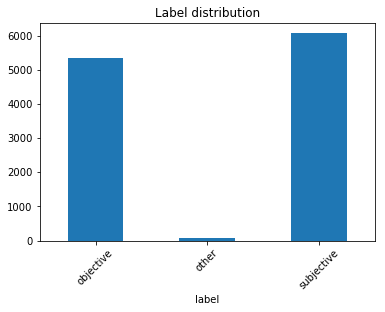

In [81]:
count_label = all_df.groupby(['label']).count().sentence_normalized
count_label.plot(kind='bar', rot=45, title="Label distribution")

Average number of words in each sentence: 23.5

Number of word in shortest sentence: 3
Its terrible .

Number of word in longest sentence: 125
as his agent pushes him to be bigger , and valerie , the bakery owner , adds a surprise of her own , stan begins to strain under the pressures of mass production while simultaneously trying to create hand painted masterpieces ... en un ca & # <NUM> ; tico principio del siglo xxi , oleadas de cr & # <NUM> ; menes saturan los informativos , y decenas de sectas tratan de captar la fe de la cada vez m & # <NUM> ; s esc & # <NUM> ; ptica poblaci & # <NUM> ; n. each brush stroke brings him inexorably closer to an unknown fate , a fate that is perhaps foretold in the very visions that fuel his work .


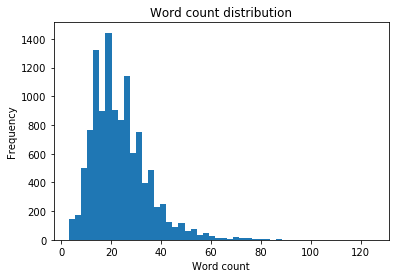

In [82]:
word_count_in_sentence = all_df['sentence_normalized'].map(word_count)
ax = word_count_in_sentence.plot.hist(bins=50, title="Word count distribution")
ax.set_xlabel("Word count")
print('Average number of words in each sentence: %.1f' % word_count_in_sentence.mean())
print()

print('Number of word in shortest sentence:', word_count_in_sentence.min())
print(all_df['sentence_normalized'][word_count_in_sentence.idxmin()])
print()

print('Number of word in longest sentence:', word_count_in_sentence.max())
print(all_df['sentence_normalized'][word_count_in_sentence.idxmax()])

## Dataset splitting

In [83]:
SEED = 23

test_size = 0.1
val_size  = 0.1

train_df, test_df = train_test_split(all_df, test_size=test_size, random_state=SEED)
train_df, val_df  = train_test_split(train_df, test_size=val_size / (1 - test_size), random_state=SEED)

print('Train size:', len(train_df.index))
print('Val size:', len(val_df.index))
print('Test size:', len(test_df.index))

save_dataset(train_df, "final.train.tsv")
save_dataset(val_df, "final.val.tsv")
save_dataset(test_df, "final.test.tsv")

Train size: 9205
Val size: 1151
Test size: 1151
